Freedom of media and speach report

In [1]:
#setup and install the package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [2]:
#read the data from the csv file and store it in a dataframe
freedomhouse = pd.read_csv('FHdataset2.csv', sep = ';', on_bad_lines= 'skip')

freedomhouse = freedomhouse.rename(columns = {
    'Country/Territory' : 'country',
    'Edition' : 'year',
    'D1': 'media',
    'D4': 'speech',
    'Total': 'total',
})


           media    speech     total
media   1.000000  0.862372  0.932256
speech  0.862372  1.000000  0.908731
total   0.932256  0.908731  1.000000


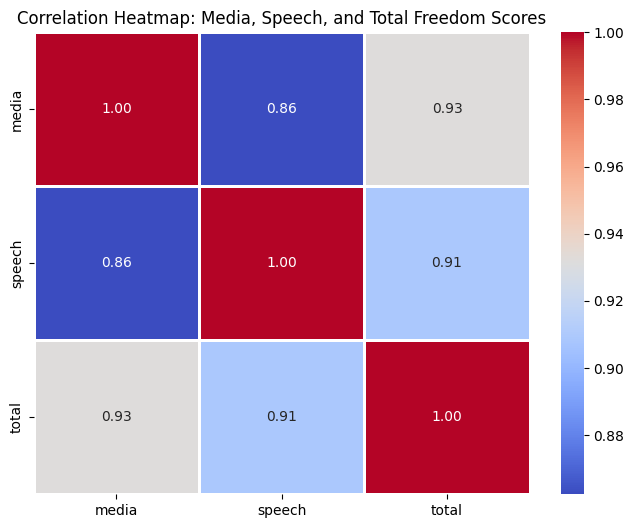

In [3]:
# Calculate the correlation matrix for media, speech and total columns
correlation_matrix_media_speech_total = freedomhouse[['media', 'speech', 'total']].corr()

# Display the correlation matrix for media, speech and total columns
print(correlation_matrix_media_speech_total)

# Set figure size
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(correlation_matrix_media_speech_total, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.8)

# Set title
plt.title("Correlation Heatmap: Media, Speech, and Total Freedom Scores")

# Show plot
plt.show()

The strong positive correlations between media freedom, speech freedom, and the total freedom score indicate that these factors are deeply interconnected. Countries with higher media and speech freedom tend to have higher overall freedom ratings, suggesting that restrictions in one area can significantly impact overall democratic health. Protecting media and speech freedoms is crucial for maintaining broader civil liberties and political rights.

The high correlations between media freedom, speech freedom, and total freedom scores align with the Freedom in the World 2024 methodology, which emphasizes these factors as key indicators of democracy. Countries with higher media freedom tend to have stronger civil liberties, while restrictions in media and speech often correlate with declining overall freedom. This confirms that protecting media and speech rights is essential for maintaining democratic governance.

In [4]:
# Calculate the proportion of cases where media freedom is higher than speech freedom
media_higher_than_speech = (freedomhouse['media'] > freedomhouse['speech']).sum()
total_cases = freedomhouse.shape[0]

# Compute percentage
percentage = round((media_higher_than_speech / total_cases) * 100, 4)

# Print formatted statement
print(f"In only {percentage}% of cases, the media freedom score is higher than the speech freedom score.")


In only 1.7893% of cases, the media freedom score is higher than the speech freedom score.


In only 1.79% of cases, the media freedom score is higher than the speech freedom score. This suggests that media restrictions often coincide with broader speech limitations, reinforcing the idea that press freedom is typically constrained alongside general speech rights.

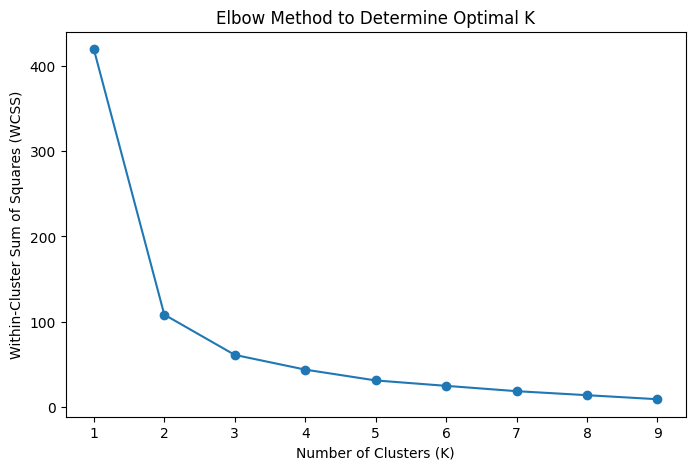

C:\Users\risad\AppData\Local\Temp\ipykernel_17888\1855135891.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freedomhouse24['cluster'] = kmeans.fit_predict(data_scaled)


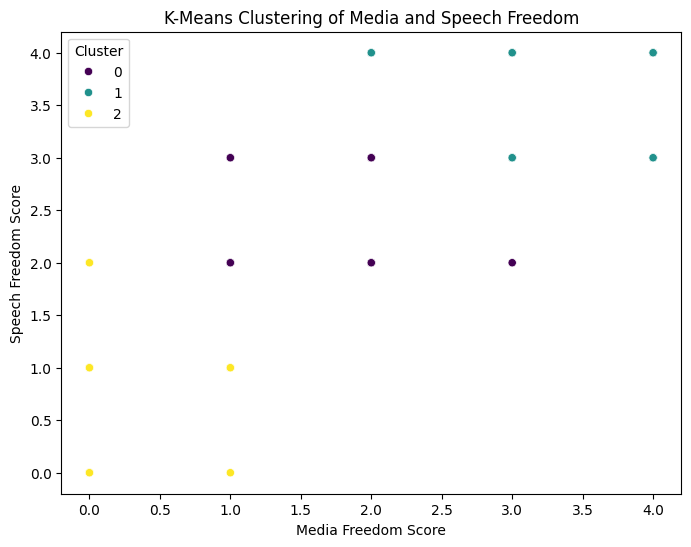

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#freedomhouse
freedomhouse24 = freedomhouse.loc[freedomhouse['Edition'] == 2024]
data = freedomhouse24[['media', 'speech']].dropna()

# Normalize the data for better clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Find optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method to Determine Optimal K")
plt.show()

# Choose the optimal K (based on the Elbow Method)
optimal_k = 3  # Adjust based on the Elbow Method results

# Apply K-Means with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
freedomhouse24['cluster'] = kmeans.fit_predict(data_scaled)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=freedomhouse24['media'], y=freedomhouse24['speech'], hue=freedomhouse24['cluster'], palette='viridis')
plt.xlabel("Media Freedom Score")
plt.ylabel("Speech Freedom Score")
plt.title("K-Means Clustering of Media and Speech Freedom")
plt.legend(title="Cluster")
plt.show()


C:\Users\risad\AppData\Local\Temp\ipykernel_17888\1944196109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freedomhouse24['country'] = freedomhouse24['country'].str.strip()


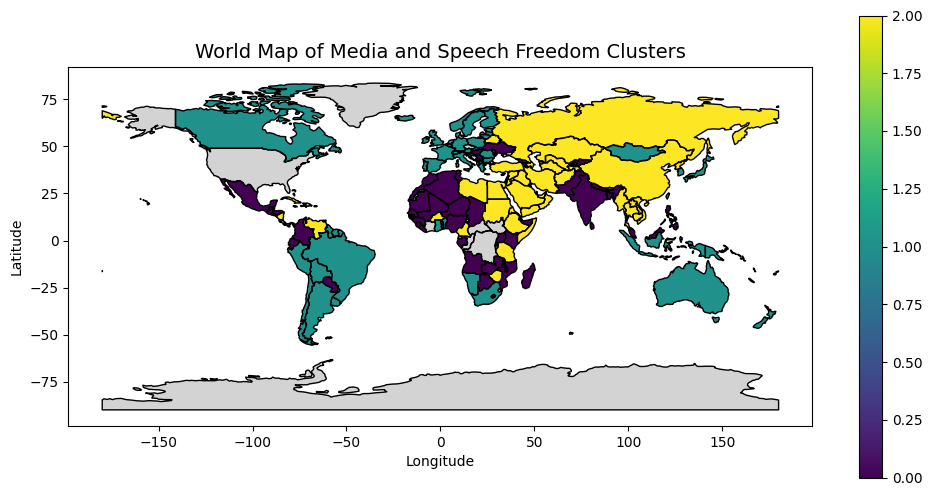

In [11]:
# Load the Natural Earth dataset manually (corrected method)
world = gpd.read_file("https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson")

# Ensure country names are properly formatted
freedomhouse24['country'] = freedomhouse24['country'].str.strip()

# Merge clustering results with world map data
merged = world.merge(freedomhouse24[['country', 'cluster']], how='left', left_on='NAME', right_on='country')

# Plot the clusters on the world map
fig, ax = plt.subplots(figsize=(12, 6))
world.boundary.plot(ax=ax, linewidth=1, color='black')  # Country borders
merged.plot(column='cluster', cmap='viridis', legend=True, ax=ax, missing_kwds={'color': 'lightgrey'})  # Color by cluster

# Titles and labels
plt.title("World Map of Media and Speech Freedom Clusters", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()

The world map visualization shows that media and speech freedom are strongly influenced by political and regional factors. Countries with low freedom scores (marked in dark purple) are mostly authoritarian regimes such as Russia, China, and several African nations, where governments tightly control the press and public discourse. These regions often experience censorship, suppression of independent journalism, and restrictions on free speech.

Countries in the middle cluster (teal) represent partial freedom, including parts of Eastern Europe, Latin America, and South Asia. These nations may have some press and speech protections, but they also face government intervention, legal restrictions, or societal pressures that limit full freedom.

The highest freedom scores (yellow) are concentrated in Western democracies like Canada, Western Europe, and Australia. These countries have strong legal protections for free speech and media independence, allowing for open political discourse and press transparency.

This clustering reinforces the direct connection between governance and freedom—countries with strong democratic institutions tend to protect speech and media rights, while authoritarian or unstable governments are more likely to impose restrictions and censorship.

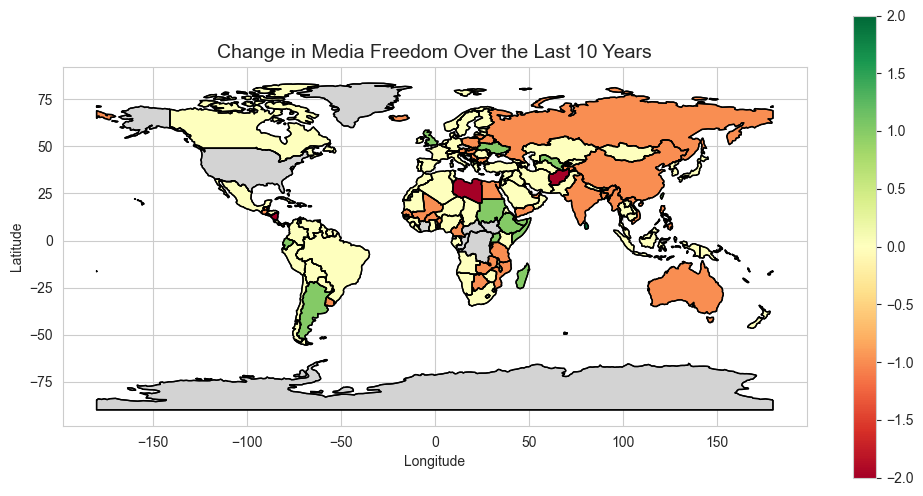

In [88]:
# Load dataset
file_path = "FHdataset2.csv"  # Update if needed
freedomhouse = pd.read_csv(file_path, sep=';', on_bad_lines='skip')

# Rename necessary columns for better readability
freedomhouse = freedomhouse.rename(columns={'Country/Territory': 'country', 'D1': 'media', 'Edition': 'year'})

# Convert year to integer for proper filtering
freedomhouse['year'] = pd.to_numeric(freedomhouse['year'], errors='coerce')

# Select only the last 10 years of data
latest_year = freedomhouse['year'].max()
earliest_year = latest_year - 10

# Filter dataset to include only relevant years
freedom_10yrs = freedomhouse[freedomhouse['year'].between(earliest_year, latest_year)]

# Pivot table to get media freedom scores for start and end years
freedom_pivot = freedom_10yrs.pivot(index='country', columns='year', values='media')

# Compute the change in media freedom score (latest year - earliest year)
freedom_pivot['change'] = freedom_pivot[latest_year] - freedom_pivot[earliest_year]

# Load world map from Natural Earth GeoJSON
world = gpd.read_file("https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson")

# Ensure country names are properly formatted
freedom_pivot.reset_index(inplace=True)
freedom_pivot['country'] = freedom_pivot['country'].str.strip()

# Merge world map with the computed change data
world = world.merge(freedom_pivot[['country', 'change']], left_on='NAME', right_on='country', how='left')

# Set custom colormap with neutral zero
cmap = plt.cm.RdYlGn  # Red for decline, Green for improvement
norm = mcolors.TwoSlopeNorm(vmin=freedom_pivot['change'].min(), 
                            vcenter=0,  # Neutral zero
                            vmax=freedom_pivot['change'].max())

# Plot the world map with media freedom changes
fig, ax = plt.subplots(figsize=(12, 6))
world.boundary.plot(ax=ax, linewidth=1, color="black")  # Country borders

# Plot the change in media freedom using a custom color scale
world.plot(column='change', cmap=cmap, norm=norm, legend=True, ax=ax,
           missing_kwds={"color": "lightgrey"}, edgecolor="black")

# Add titles and labels
plt.title("Change in Media Freedom Over the Last 10 Years", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show plot
plt.show()



Over the past 10 years, media freedom has declined in many regions, particularly in Russia, parts of Asia, and some African countries, where government control over the press has tightened, often due to political instability, authoritarian policies, or increased censorship laws.

In contrast, some South American and African nations have shown improvements, likely due to democratic reforms, reduced government intervention, or increased press protections. Many countries have remained stable with little change.

The widespread decline suggests a global trend where governments are imposing stricter controls on information flow, often under the pretext of national security, political stability, or combating misinformation. Meanwhile, countries that improved may have benefited from stronger legal protections, international influence, or civil society efforts.

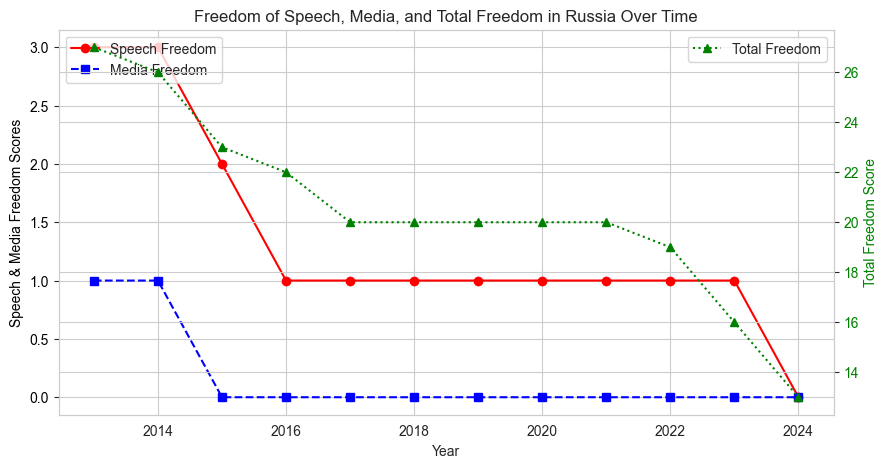

In [90]:
# Rename columns to match the notebook
freedomhouse = freedomhouse.rename(columns={
    "Country/Territory": "country",
    "Edition": "year",
    "D1": "media",
    "D4": "speech",
    "Total": "total"
})

# Convert year column to numeric
freedomhouse["year"] = pd.to_numeric(freedomhouse["year"], errors="coerce")

# Filter data for Russia
russia_data = freedomhouse[freedomhouse["country"] == "Russia"].sort_values(by="year")

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Freedom of Speech (D4) and Media Freedom (D1) on the primary axis
ax1.plot(russia_data["year"], russia_data["speech"], marker="o", linestyle="-", color="red", label="Speech Freedom")
ax1.plot(russia_data["year"], russia_data["media"], marker="s", linestyle="--", color="blue", label="Media Freedom")

# Axis formatting
ax1.set_xlabel("Year")
ax1.set_ylabel("Speech & Media Freedom Scores", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.set_title("Freedom of Speech, Media, and Total Freedom in Russia Over Time")

# Create secondary y-axis for Total Freedom
ax2 = ax1.twinx()
ax2.plot(russia_data["year"], russia_data["total"], marker="^", linestyle=":", color="green", label="Total Freedom")

# Formatting second y-axis
ax2.set_ylabel("Total Freedom Score", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Grid and show
ax1.grid(True)
plt.show()


The graph shows a sharp decline in Russia’s freedom of speech and media freedom over the past decade, with a particularly steep drop around 2015. Since then, both freedoms have remained severely restricted. Media freedom has been almost nonexistent, while speech freedom remains very low, reflecting increased government censorship, suppression of dissent, and tighter control over independent journalism. The total freedom score has also steadily declined, aligning with growing authoritarian policies, crackdowns on opposition, and control over public discourse, especially in the wake of geopolitical conflicts and domestic repression.